# Problem Statement: 

As a data analyst, the goal is to analyze the given dataset containing information about coffee samples from different countries and farms. The objective is to gain insights and provide valuable information to stakeholders in the coffee industry. The analysis aims to understand the quality and characteristics of the coffee samples, identify trends, and make data-driven recommendations for improving coffee production and marketing strategies.

## Questions:

Q1 - Which country of origin has the highest average cup points and overall coffee quality?

Q2 - What are the dominant processing methods used across different farms and regions?

Q3 - Which farms or regions consistently produce coffee with high scores for aroma, flavor, and aftertaste?

Q4 - Is there a correlation between altitude and cup points? How does the altitude affect coffee quality?

Q5 - What is the distribution of different defects in the coffee samples, and which defects have the most significant impact on cup points?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/12367/Documents/Python Scripts/df_arabica_clean.csv')
df.head()

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             207 non-null    int64  
 1   ID                     207 non-null    int64  
 2   Country of Origin      207 non-null    object 
 3   Farm Name              205 non-null    object 
 4   Lot Number             206 non-null    object 
 5   Mill                   204 non-null    object 
 6   ICO Number             75 non-null     object 
 7   Company                207 non-null    object 
 8   Altitude               206 non-null    object 
 9   Region                 205 non-null    object 
 10  Producer               206 non-null    object 
 11  Number of Bags         207 non-null    int64  
 12  Bag Weight             207 non-null    object 
 13  In-Country Partner     207 non-null    object 
 14  Harvest Year           207 non-null    object 
 15  Gradin

### Dropping the columns that are not required for the goals to be accomplised in the following project 

In [4]:
df.drop(columns={'Lot Number', 'Mill', 'ICO Number', 'Number of Bags', 'Bag Weight', 'Status', 'Expiration', 'Certification Body', 'Certification Address', 'Certification Contact', 'Defects'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            207 non-null    int64  
 1   ID                    207 non-null    int64  
 2   Country of Origin     207 non-null    object 
 3   Farm Name             205 non-null    object 
 4   Company               207 non-null    object 
 5   Altitude              206 non-null    object 
 6   Region                205 non-null    object 
 7   Producer              206 non-null    object 
 8   In-Country Partner    207 non-null    object 
 9   Harvest Year          207 non-null    object 
 10  Grading Date          207 non-null    object 
 11  Owner                 207 non-null    object 
 12  Variety               201 non-null    object 
 13  Processing Method     202 non-null    object 
 14  Aroma                 207 non-null    float64
 15  Flavor                2

In [5]:
# Null value treatment
for column in df.columns:
    sum = df[column].isnull().sum()
    if sum > 0:
        print('Columns Name - ', column, ' Number of Null Values - ', sum)

Columns Name -  Farm Name  Number of Null Values -  2
Columns Name -  Altitude  Number of Null Values -  1
Columns Name -  Region  Number of Null Values -  2
Columns Name -  Producer  Number of Null Values -  1
Columns Name -  Variety  Number of Null Values -  6
Columns Name -  Processing Method  Number of Null Values -  5


In [6]:
# Dropping null values
df.dropna(inplace=True)
df.isnull().sum()

Unnamed: 0              0
ID                      0
Country of Origin       0
Farm Name               0
Company                 0
Altitude                0
Region                  0
Producer                0
In-Country Partner      0
Harvest Year            0
Grading Date            0
Owner                   0
Variety                 0
Processing Method       0
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean Cup               0
Sweetness               0
Overall                 0
Total Cup Points        0
Moisture Percentage     0
Category One Defects    0
Quakers                 0
Color                   0
Category Two Defects    0
dtype: int64

### Q1 - Which country of origin has the highest average cup points and overall coffee quality?

In [7]:
df_Q1 = pd.DataFrame(df['Country of Origin'].unique(), columns=['Country of Origin'])
df_Q1['Avg Cup Points'] = 0  # Initialize the 'Avg Cup Points' column to 0
df_Q1['Avg Overall Quality'] = np.nan  # Initialize the 'Avg Overall Quality' column with NaN

for index, country in enumerate(df_Q1['Country of Origin']):
    sum_cup_points = df[df['Country of Origin'] == country]['Total Cup Points'].sum()
    n_cup_points = df[df['Country of Origin'] == country]['Total Cup Points'].count()
    df_Q1.loc[index, 'Avg Cup Points'] = sum_cup_points / n_cup_points

    sum_quality = df[df['Country of Origin'] == country]['Overall'].sum()
    n_quality = df[df['Country of Origin'] == country]['Overall'].count()
    if n_quality != 0:
        df_Q1.loc[index, 'Avg Overall Quality'] = sum_quality / n_quality

df_Q1 = df_Q1.dropna(subset=['Avg Overall Quality']).reset_index(drop=True)


In [8]:
df_Q1.head(25)

,Country of Origin,Avg Cup Points,Avg Overall Quality
0,Colombia,83.781250,7.654375
1,Taiwan,84.363559,7.810000
2,Laos,83.390000,7.636667
3,Costa Rica,83.740000,7.813750
4,Guatemala,84.416500,7.800000
5,"Tanzania, United Republic Of",84.735000,7.791667
6,Ethiopia,84.960909,7.862727
7,Thailand,82.827500,7.479167
8,United States (Hawaii),83.650000,7.666000
9,Kenya,83.710000,7.750000


In [9]:
df_Q1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country of Origin    22 non-null     object 
 1   Avg Cup Points       22 non-null     float64
 2   Avg Overall Quality  22 non-null     float64
dtypes: float64(2), object(1)
memory usage: 656.0+ bytes


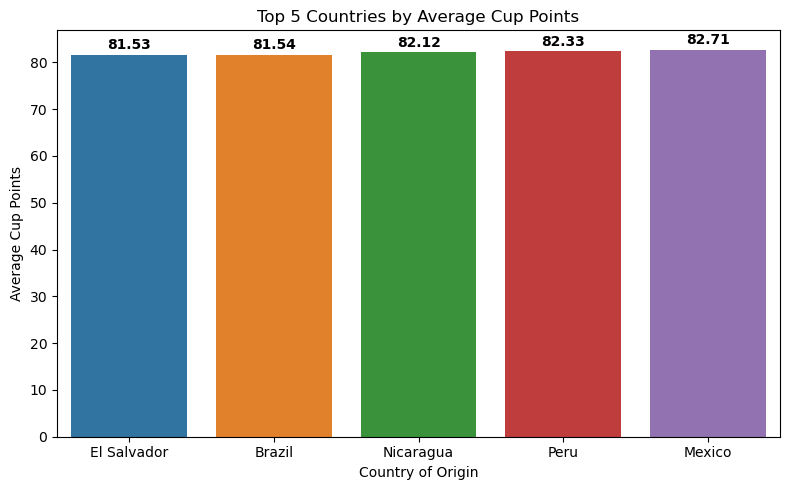

In [10]:

plt.figure(figsize=(8, 5))

df_Q1.sort_values(by='Avg Cup Points', inplace=True)
top_5_countries = df_Q1.head(5)

ax = sns.barplot(data=top_5_countries, x='Country of Origin', y='Avg Cup Points')

plt.xlabel('Country of Origin')
plt.ylabel('Average Cup Points')
plt.title('Top 5 Countries by Average Cup Points')

# Add text labels on top of each bar
# This is the location for the annotated text
i = 1.0
j = 2

# Annotating the bar plot with the values (Avg Cup Points)
for i in range(len(top_5_countries)):
    ax.annotate(
        f"{round(top_5_countries.iloc[i]['Avg Cup Points'], 2)}",  # Text to display (rounded to 2 decimal places)
        xy=(i, top_5_countries.iloc[i]['Avg Cup Points']),  # Position of the point to annotate
        xytext=(0, j),  # Offset from the point (x, y)
        textcoords="offset points",  # Interpret the xytext as offset coordinates
        ha='center',  # Horizontal alignment of the text
        va='bottom' if top_5_countries.iloc[i]['Avg Cup Points'] > 0 else 'top',  # Vertical alignment of the text
        fontsize=10,  # Font size of the text
        fontweight='bold'  # Font weight of the text
    )


plt.tight_layout()  # Adjust the layout to prevent overlapping of labels

plt.show()


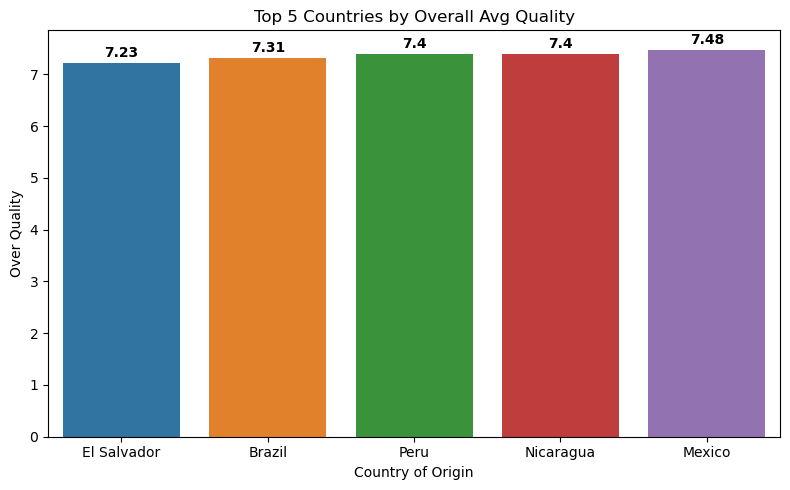

In [11]:
plt.figure(figsize=(8,5))

df_Q1.sort_values(by='Avg Overall Quality', inplace=True)
top_5_countries_quality = df_Q1.head(5)

bx = sns.barplot(data= top_5_countries_quality, x= 'Country of Origin',y='Avg Overall Quality')

plt.xlabel('Country of Origin')
plt.ylabel('Over Quality')
plt.title('Top 5 Countries by Overall Avg Quality')

i = 1.0
j = 2

for i in range(len(top_5_countries_quality)):
    bx.annotate(
        f"{round(top_5_countries_quality.iloc[i]['Avg Overall Quality'],2 )}",
        xy=(i, top_5_countries_quality.iloc[i]['Avg Overall Quality']),
        xytext=(0,j),
        textcoords='offset points',
        ha='center',
        va='bottom' if top_5_countries_quality.iloc[i]['Avg Overall Quality'] > 0 else 'top',
        fontsize = 10,
        fontweight = 'bold'
    )
    
plt.tight_layout()
plt.show()
     

## Q2 - What are the dominant processing methods used?

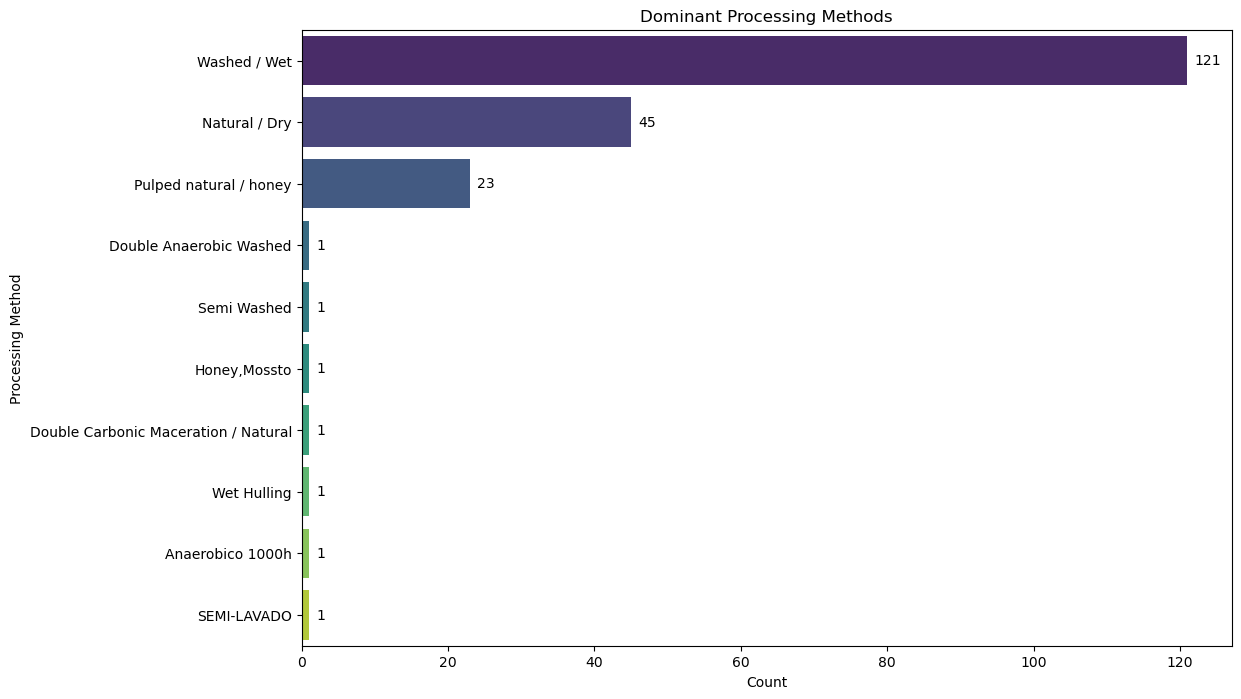

In [12]:
# Group the data by processing method and count the occurrences
processing_counts = df['Processing Method'].value_counts()

# Plot the dominant processing methods
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Processing Method', order=processing_counts.index, palette='viridis')

# Add label markers to the plot
for i, count in enumerate(processing_counts):
    plt.text(count+1, i, str(count), ha='left', va='center')

plt.xlabel('Count')
plt.ylabel('Processing Method')
plt.title('Dominant Processing Methods')
plt.show()


### Q3 - Which top 3 regions consistently produce coffee with high scores for aroma, flavor, and aftertaste?


C:\Users\12367\AppData\Local\Temp\ipykernel_26592\3431349528.py:41: UserWarning: Glyph 26032 (\N{CJK UNIFIED IDEOGRAPH-65B0}) missing from current font.
  plt.tight_layout()
C:\Users\12367\AppData\Local\Temp\ipykernel_26592\3431349528.py:41: UserWarning: Glyph 31481 (\N{CJK UNIFIED IDEOGRAPH-7AF9}) missing from current font.
  plt.tight_layout()
C:\Users\12367\AppData\Local\Temp\ipykernel_26592\3431349528.py:41: UserWarning: Glyph 32291 (\N{CJK UNIFIED IDEOGRAPH-7E23}) missing from current font.
  plt.tight_layout()
c:\Users\12367\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26032 (\N{CJK UNIFIED IDEOGRAPH-65B0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\12367\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31481 (\N{CJK UNIFIED IDEOGRAPH-7AF9}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\12367\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152:

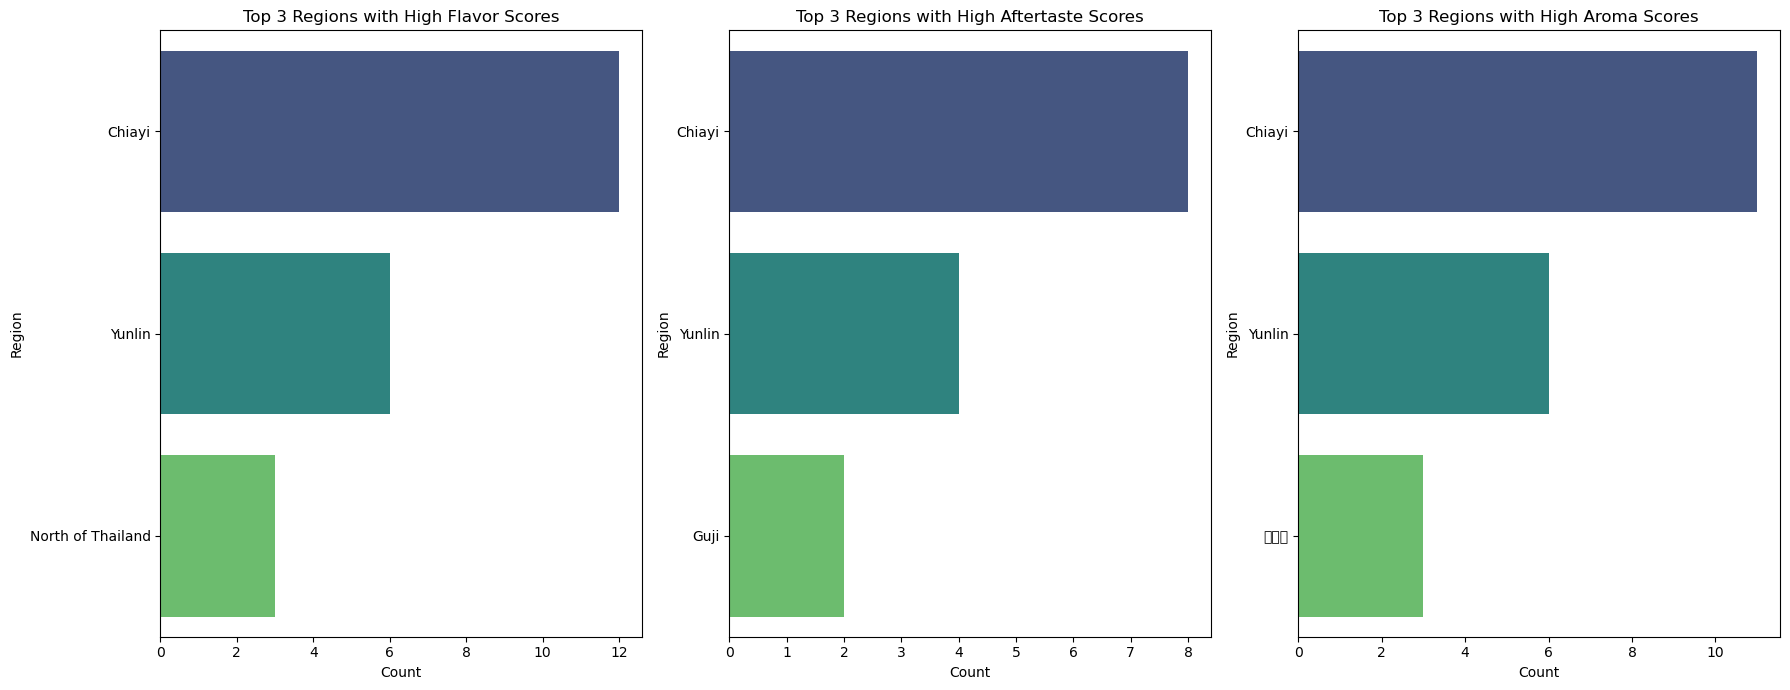

In [13]:


# Define the threshold for high scores
threshold = 7.8

#Filter The Data for high Aroma scores
high_aroma_data = df[df['Aroma']>threshold]
aroma_count = high_aroma_data['Region'].value_counts()
top_3_aroma_region = aroma_count.head(3)

# Filter the data for high flavor scores
high_flavor_data = df[df['Flavor'] > threshold]
flavor_counts = high_flavor_data['Region'].value_counts()
top_3_flavor_regions = flavor_counts.head(3)

# Filter the data for high aftertaste scores
high_aftertaste_data = df[df['Aftertaste'] > threshold]
aftertaste_counts = high_aftertaste_data['Region'].value_counts()
top_3_aftertaste_regions = aftertaste_counts.head(3)

# Create subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(18, 7))

# Plot top 3 regions with high flavor scores
sns.barplot(ax=axs[0], x=top_3_flavor_regions.values, y=top_3_flavor_regions.index, palette='viridis')
axs[0].set_xlabel('Count')
axs[0].set_ylabel('Region')
axs[0].set_title('Top 3 Regions with High Flavor Scores')

# Plot top 3 regions with high aftertaste scores
sns.barplot(ax=axs[1], x=top_3_aftertaste_regions.values, y=top_3_aftertaste_regions.index, palette='viridis')
axs[1].set_xlabel('Count')
axs[1].set_ylabel('Region')
axs[1].set_title('Top 3 Regions with High Aftertaste Scores')

# Plot top 3 regions with high Aroma Scores
sns.barplot(ax=axs[2], x=top_3_aroma_region.values, y=top_3_aroma_region.index, palette='viridis')
axs[2].set_xlabel('Count')
axs[2].set_ylabel('Region')
axs[2].set_title('Top 3 Regions with High Aroma Scores')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

### Q4 - Is there a correlation between altitude and cup points? How does the altitude affect coffee quality?


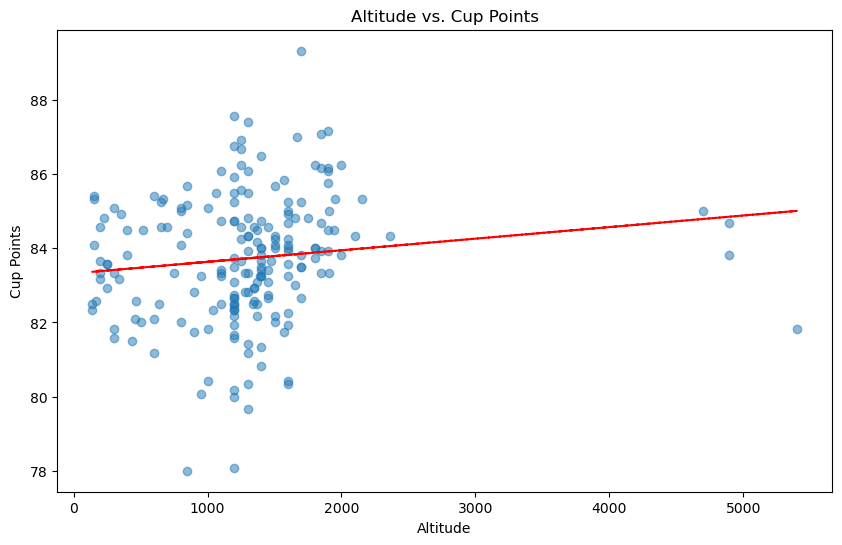

In [14]:
import re
import matplotlib.pyplot as plt
import numpy as np

# Clean 'Altitude' column and convert to float
df['Altitude'] = df['Altitude'].apply(lambda x: float(re.split(r'\D+', x)[0]))

# Convert 'Total Cup Points' column to float
df['Total Cup Points'] = df['Total Cup Points'].astype(float)

# Create a scatter plot of altitude vs. cup points
plt.figure(figsize=(10, 6))
plt.scatter(df['Altitude'], df['Total Cup Points'], alpha=0.5)
plt.xlabel('Altitude')
plt.ylabel('Cup Points')
plt.title('Altitude vs. Cup Points')

# Add a trendline or regression line
z = np.polyfit(df['Altitude'], df['Total Cup Points'], 1)
p = np.poly1d(z)
plt.plot(df['Altitude'], p(df['Altitude']), "r--")

plt.show()


### Q5 - What is the distribution of different defects in the coffee samples, and which defects have the most significant impact on cup points?

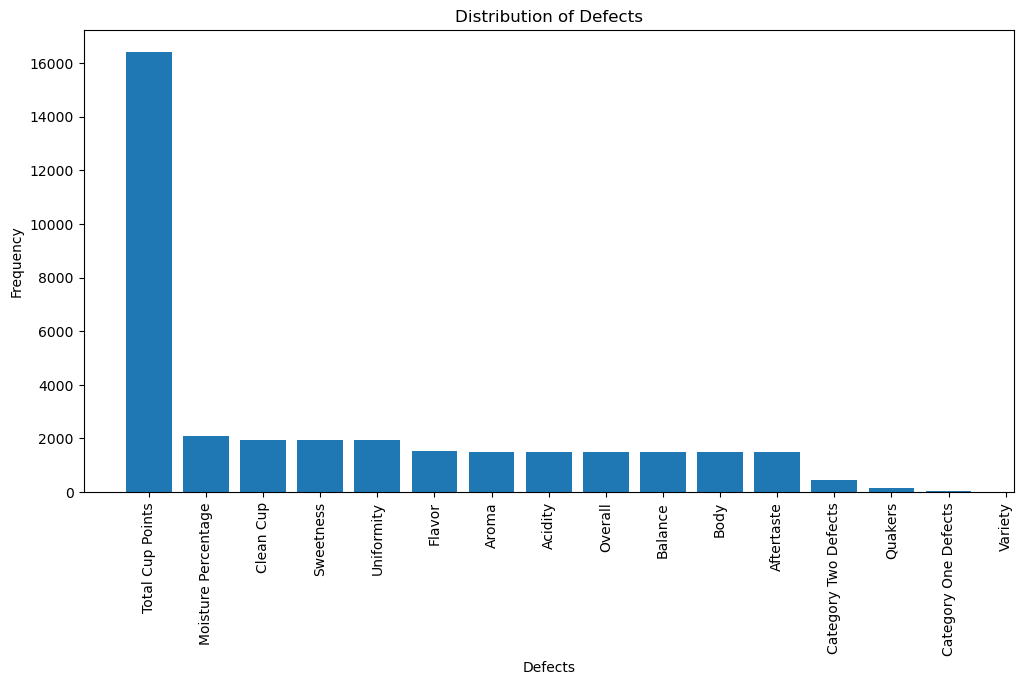

In [15]:
defect_counts = df.iloc[:, 12:31].sum().to_frame(name='Frequency')
defect_counts['Frequency'] = pd.to_numeric(defect_counts['Frequency'], errors='coerce')
sorted_defects = defect_counts.sort_values(by='Frequency', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(sorted_defects.index, sorted_defects['Frequency'])
plt.xlabel('Defects')
plt.ylabel('Frequency')
plt.title('Distribution of Defects')
plt.xticks(rotation=90)
plt.show()


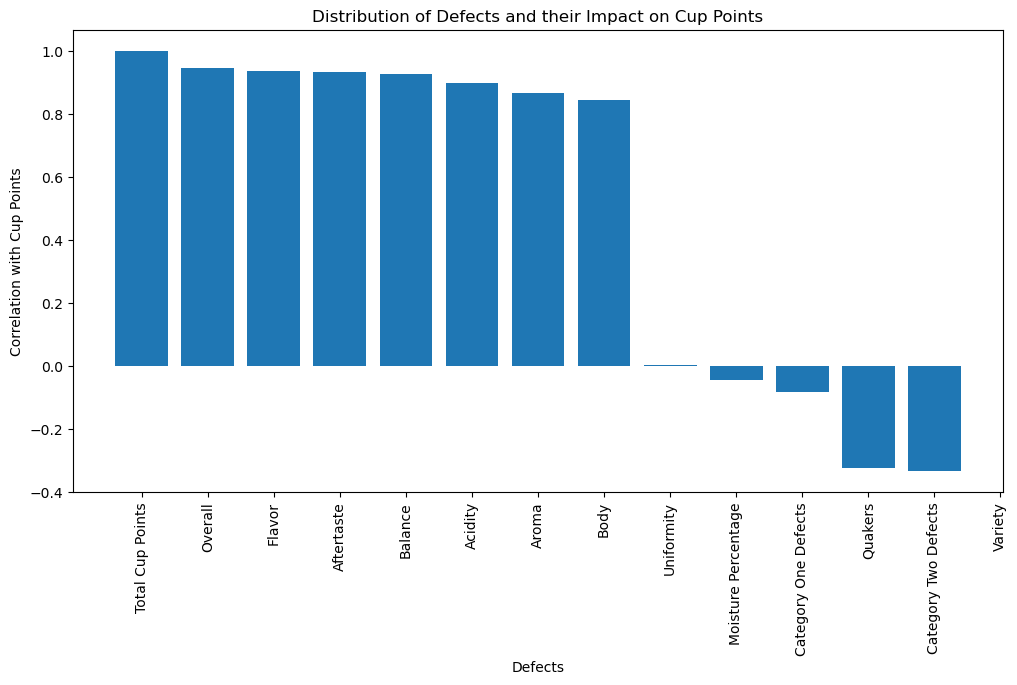

In [16]:
defect_columns = df.columns[12:31]

# Convert defect columns and 'Total Cup Points' to numeric type
df[defect_columns] = df[defect_columns].apply(pd.to_numeric, errors='coerce')
df['Total Cup Points'] = pd.to_numeric(df['Total Cup Points'], errors='coerce')

# Calculate the correlation between each defect and 'Total Cup Points'
correlations = df[defect_columns].apply(lambda x: df['Total Cup Points'].corr(x))

# Sort the correlations in descending order
sorted_correlations = correlations.sort_values(ascending=False)

# Plot the distribution of defects
plt.figure(figsize=(12, 6))
plt.bar(sorted_correlations.index, sorted_correlations.values)
plt.xlabel('Defects')
plt.ylabel('Correlation with Cup Points')
plt.title('Distribution of Defects and their Impact on Cup Points')
plt.xticks(rotation=90)
plt.show()
